<a href="https://colab.research.google.com/github/mohita122/capstone_3_health_insurence_cross_sell_prediction/blob/main/capstone_3_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEALTH INSURANCE CROSS SELL PREDICTION**    



##### **Project Type**    - ML-Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Mohita Rathour
##### **Team Member 2 -** Abhishek Kumar
##### **Team Member 3 -** Amitha Sridhar
##### **Team Member 4 -** Mukesh Sablani
##### **Team Memver 5 -** Sanjay Paul

# **Project Summary -**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

Vehicle insurance (also known as car insurance, motor insurance, or auto insurance) is insurance for cars, trucks, motorcycles, and other road vehicles. Its primary use is to provide financial protection against physical damage or bodily injury resulting from traffic collisions and against liability that could also arise from incidents in a vehicle.


# **GitHub Link -**

https://github.com/mohita122/capstone_3_health_insurence_cross_sell_prediction/blob/main/capstone_3_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb

# **Problem Statement**


Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
#Importing libraries for data handeling
import pandas as pd
import numpy as np
from numpy import math
import warnings
warnings.filterwarnings('ignore')

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Importing Machine Learning libraries
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ML Models
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn import metrics
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer


#Classification Score
from sklearn.feature_selection import mutual_info_classif

# Importing libraries for hanling imbalanced data
from imblearn.over_sampling import SMOTE
from collections import Counter

# Visualization 
from sklearn.tree import export_graphviz
from sklearn import tree
from xgboost import plot_tree

### Dataset Loading

In [ ]:
# Load Dataset
#importing the drive
 
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/health_insurence_cross_sell_pridiction/Csv HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(381109, 12)

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## ***2. Understanding Your Variables***


In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values 
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### What did you know about your dataset?

1.   As we can see, our data set contains 381109 rows and 12 columns.
2.   We do not have any Null Values in our dataset.
3.   We have 4 numeric and 5 categorical independent features.

## 3. ***Data Wrangling***

### **3.1 Dropping column**

In [ ]:
# Write your code to make your dataset analysis ready.
#dropping the id column
df.drop(columns = 'id', inplace = True)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## **3.2 Checking for outliers**

In [ ]:
numerical_features=["Age","Annual_Premium","Vintage"]

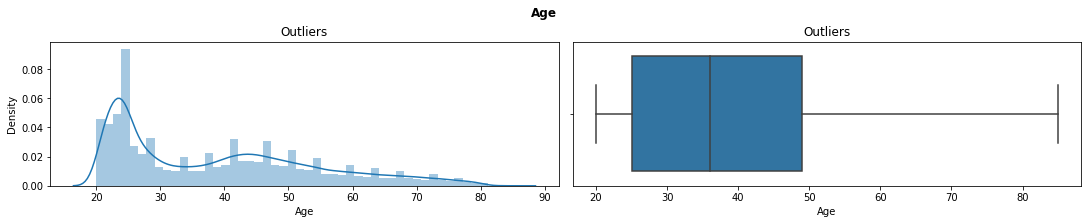

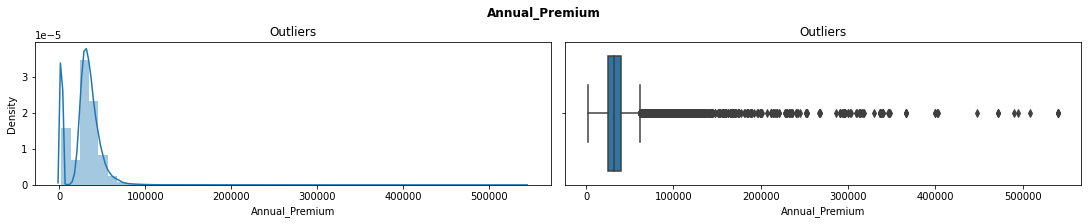

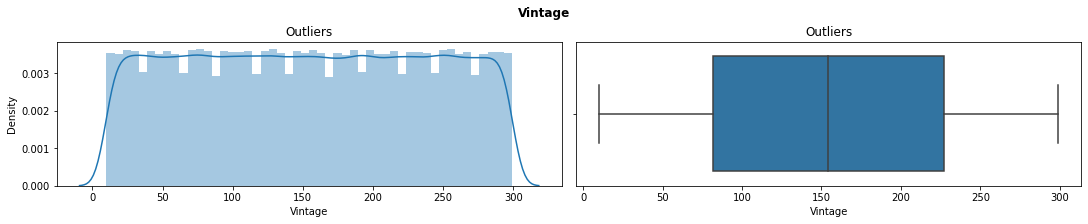

In [ ]:
for col in numerical_features:  #subplotting all the values with outliers 
  fig, ax =plt.subplots(1,2, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Outliers")
  sns.boxplot(df[col], ax=ax[1]).set(title="Outliers")
  plt.suptitle(f'{col.title()}',weight='bold')

## **3.3 Handling Outliers**

In [ ]:
for col in ['Age','Annual_Premium']:#redefining the data and setting the outliers value with the range
  
  lower_cap, q1, q3, upper_cap, median = df[col].quantile([0.01,0.25,0.75,0.99,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  
  df[col] = np.where(df[col] > upper_limit, median,np.where(
                         df[col] < lower_limit,median,np.where(
                         df[col] < lower_cap,lower_cap,np.where(
                         df[col] > upper_cap,upper_cap,df[col]))))

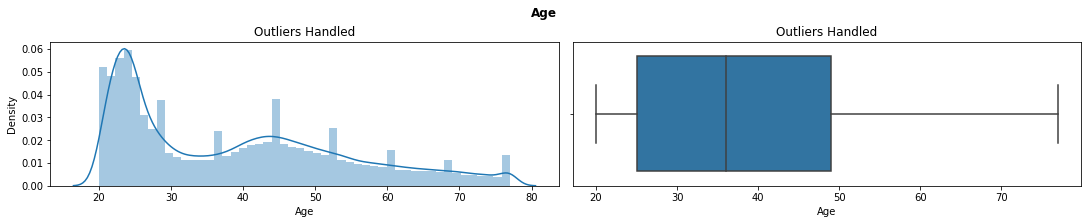

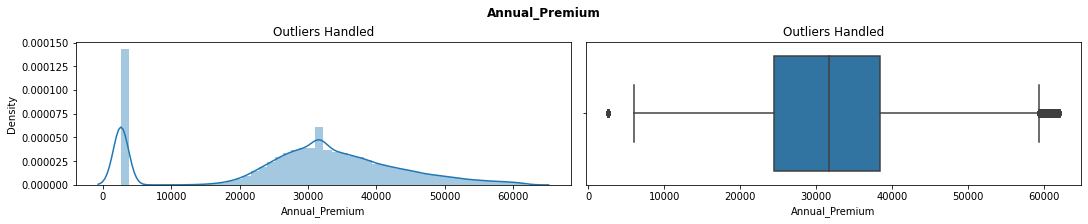

In [ ]:
for col in ['Age','Annual_Premium']:
  fig, ax =plt.subplots(1,2, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Outliers Handled")
  sns.boxplot(df[col], ax=ax[1]).set(title="Outliers Handled")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

Outliers from annual premium and age are handled with IQR method.

##**3.4 Correlation**

Text(0.5, 1.05, 'Heat Corelation Map')

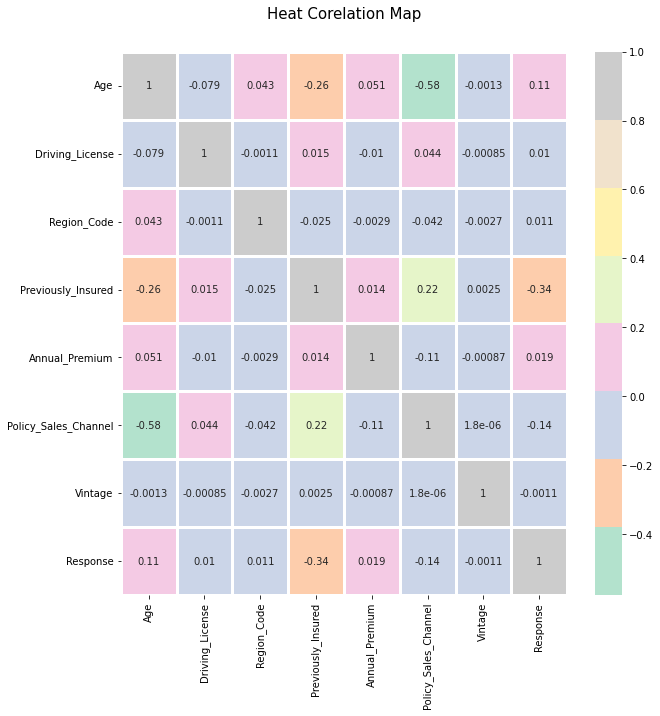

In [ ]:
# Finding correlation
corr = df.corr()

f, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='Pastel2')

plt.title("Heat Corelation Map", y=1.05, size=15)

### What all manipulations have you done and insights you found?



We have dropped Id column as it is a unique component in the dataset.

Here Column 'Age', 'Annual Premium' and 'Vintage' are numerical features abut there are outliers in the 'Age' and 'Annual Premium' only.
Here we have used IQR(Inter-Quartile Range) method to treat the outliers.

We have used Heatmap to show the correlation between all the features.

We can see that all the features are very less correlated to each other.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# Chart - 1 visualization code
features = df.loc[ : , df.columns != 'Response']

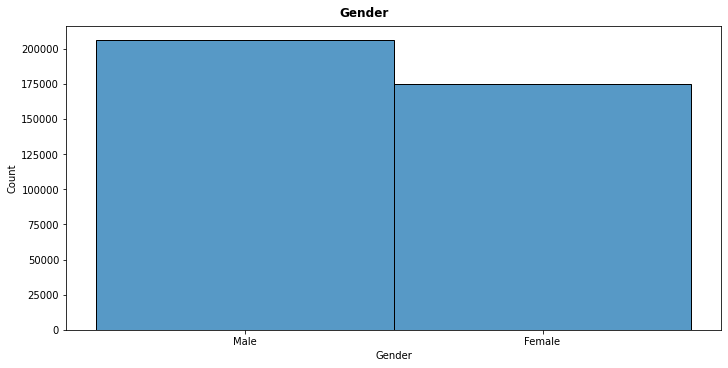

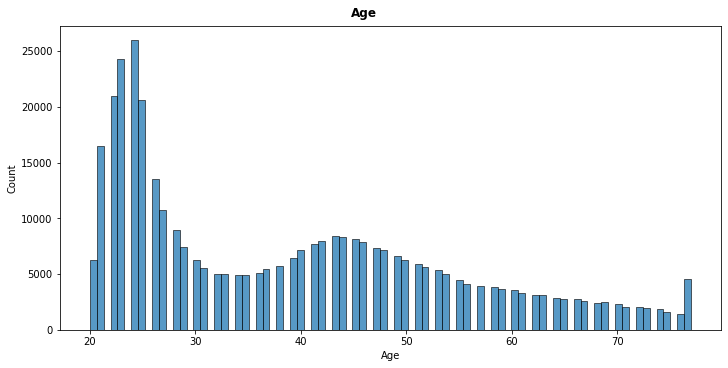

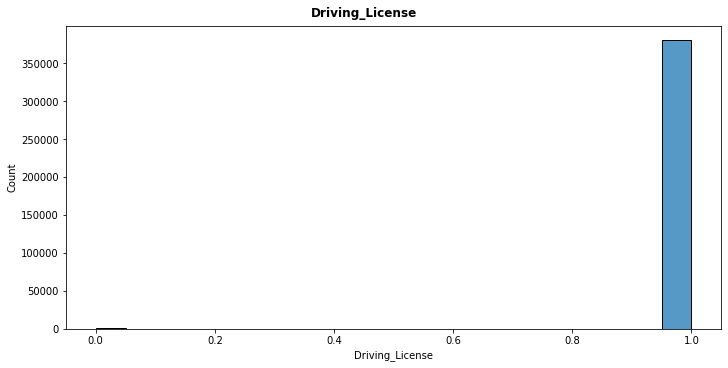

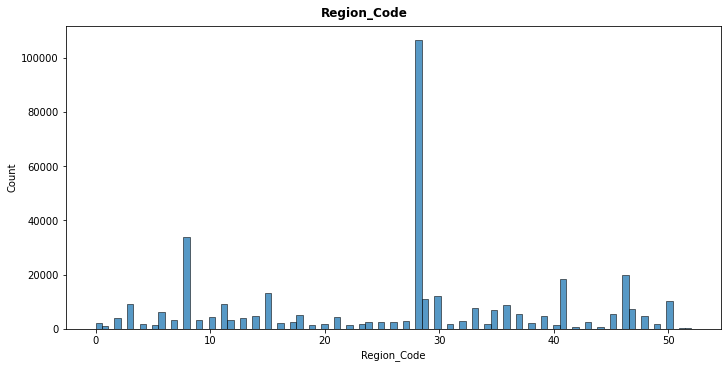

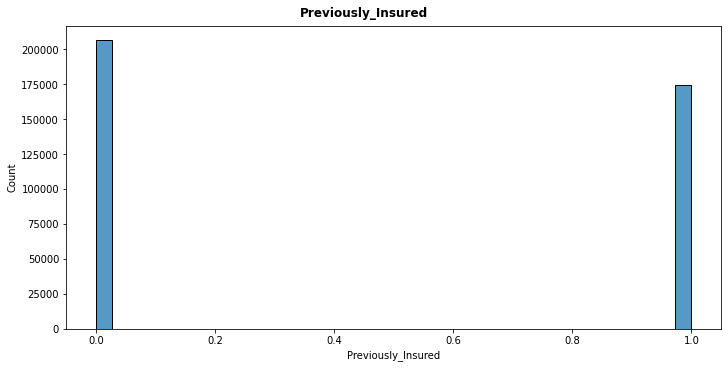

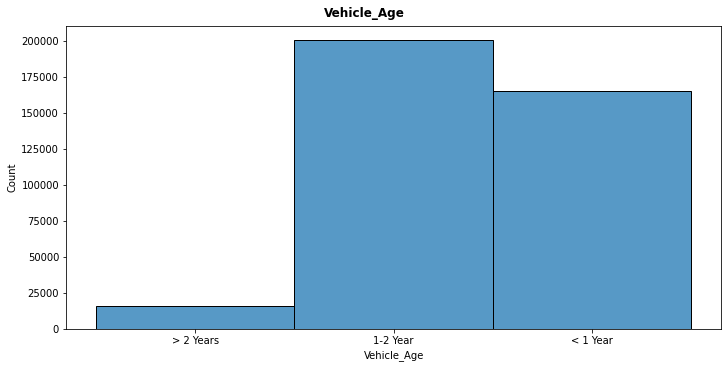

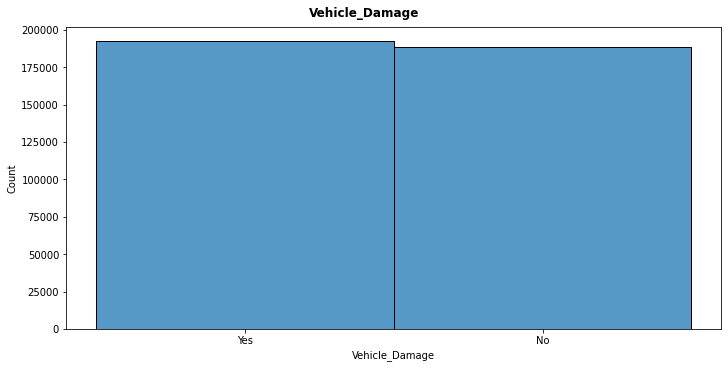

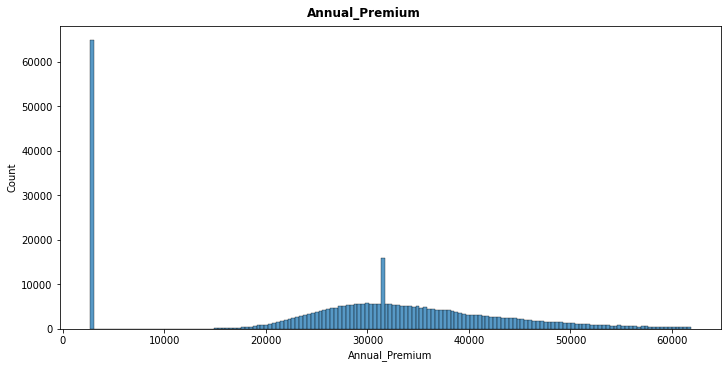

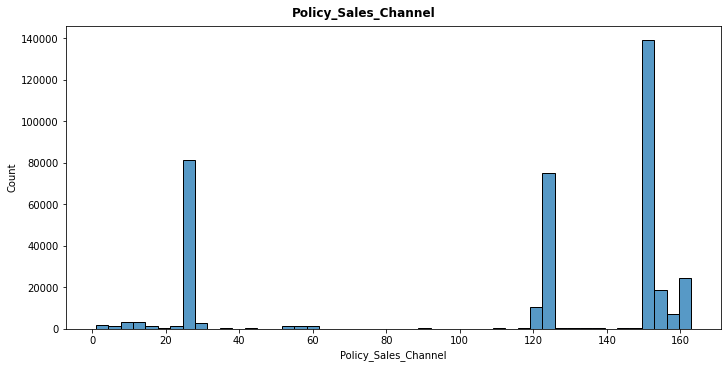

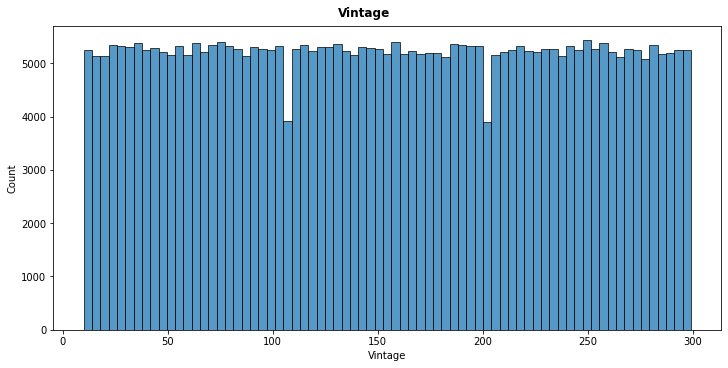

In [ ]:
for col in features:
  fig, ax =plt.subplots(1,1, constrained_layout=True)
  fig.set_size_inches(10, 5)
  sns.histplot(df[col])
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

#### **Chart - 1 Gender Vs Response**

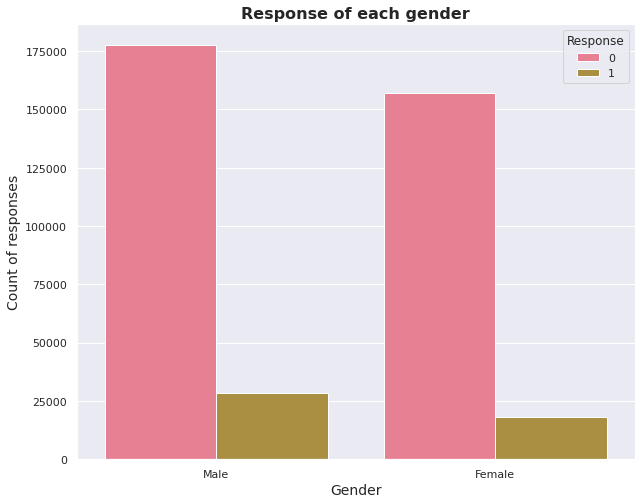

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("husl")
graph = sns.countplot(x=df['Gender'],hue=df['Response'])
graph.set_title('Response of each gender',fontsize = 16, fontweight='bold')
graph.set_xlabel('Gender',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

##### 1. Why did you pick the specific chart?

Response of gender, while purchasing vehicle insurance.

##### 2. What is/are the insight(s) found from the chart?

This graph shows that Males prefer more to take Vehicle Insurance as compared to Females.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights help creating a positive business impact, as it suggests the target customer as well as creating new market apporach to reach female gender.

**Chart - 2 Age Vs Response**

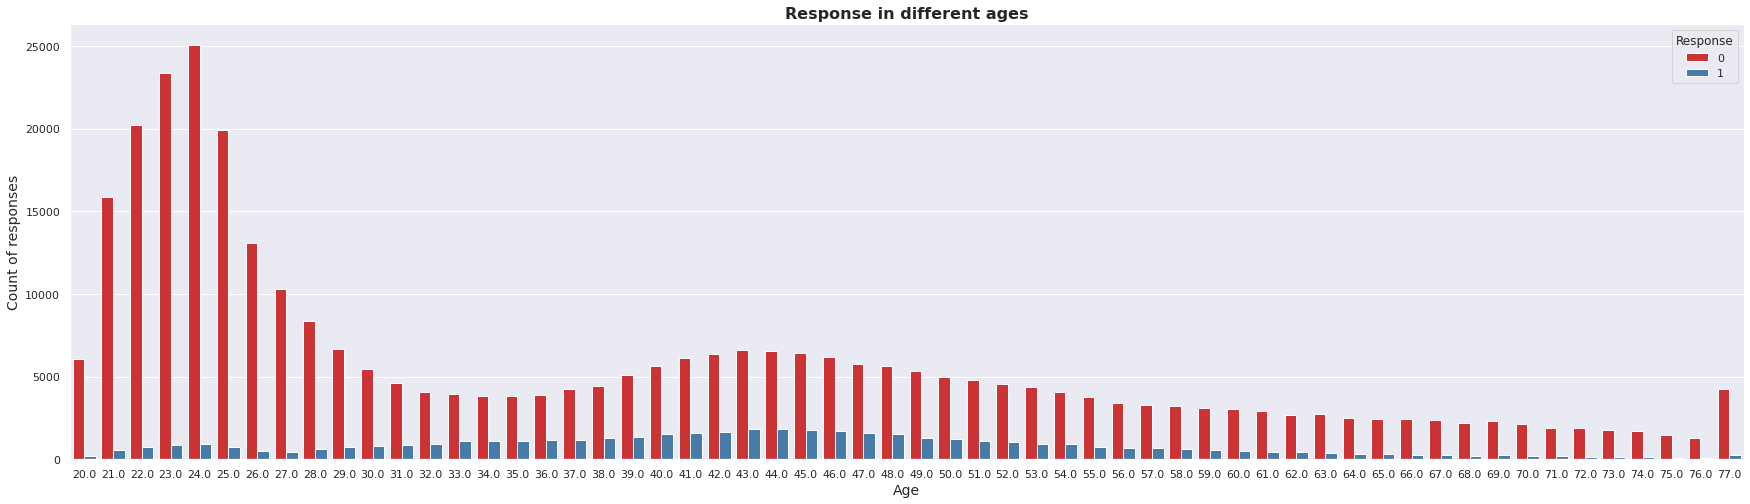

In [ ]:
# Chart - 2 visualization code
sns.set(rc={'figure.figsize':(30,8)})
sns.set_palette("Set1")
graph = sns.countplot(x='Age',hue = 'Response', data=df)
graph.set_title('Response in different ages',fontsize = 16, fontweight='bold')
graph.set_xlabel('Age',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

##### 1. Why did you pick the specific chart?

To study about from which age group segments, we are getting majority and minority of customers.

##### 2. What is/are the insight(s) found from the chart?



It shows that majority of people lies between the age group of 20-30 Years in this dataset but people from the age group 30-50 are more intrested in taking Vehicle Insurance as most of the people of this age group have taken .

### **binned age of people into 3 groups into 'Young Age', 'Middle Age' and 'Old Age'**

In [ ]:
df['Age_Group'] = df['Age'].apply(lambda x:'Young Age' if x >= 20 and x<=40 else 'Middle Age' if x>40 and x<=60 else 'Old Age')

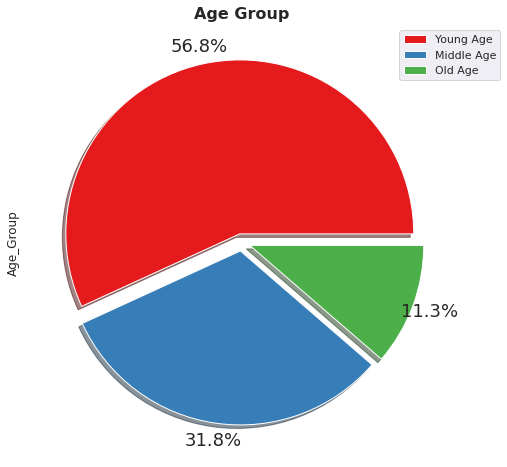

In [ ]:
ax=df['Age_Group'].value_counts().plot.pie(explode=[0.05]*3, autopct='%1.1f%%', figsize=(15,8),fontsize=18,pctdistance=1.1,shadow=True,labeldistance=1.3,labels=None)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=df['Age_Group'].value_counts().index.tolist())
plt.title('Age Group',fontsize = 16, fontweight='bold')
plt.show()

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Here we have binned age of people into 3 groups into 'Young Age', 'Middle Age' and 'Old Age' based on their age criteria.

This graph shows that most of the people are from Young Age, hence comprising 56.8% of total population

#### **Chart - 3 Driving license**

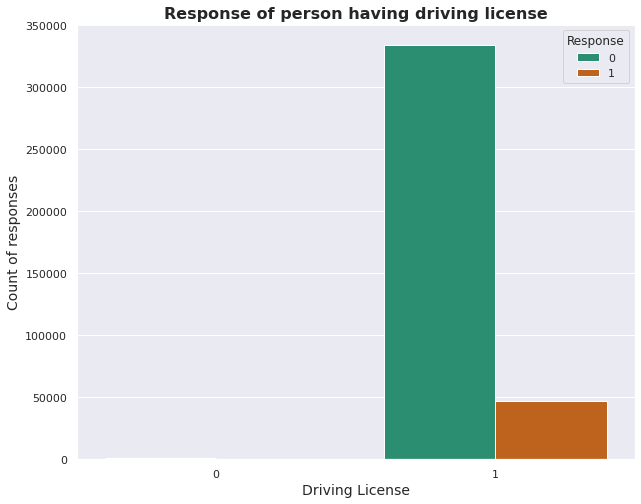

In [ ]:
# Chart - 3 visualization code
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("Dark2")
graph = sns.countplot(x=df['Driving_License'],hue=df['Response'])
graph.set_title('Response of person having driving license',fontsize = 16, fontweight='bold')
graph.set_xlabel('Driving License',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

##### 1. Why did you pick the specific chart?

To study response of person having driving license.

##### 2. What is/are the insight(s) found from the chart?

This graph shows that people having Driving License are more expected to take Vehicle Insurance.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This graph gives information about target business customers.

#### **Chart - 4 Region Vs Response**

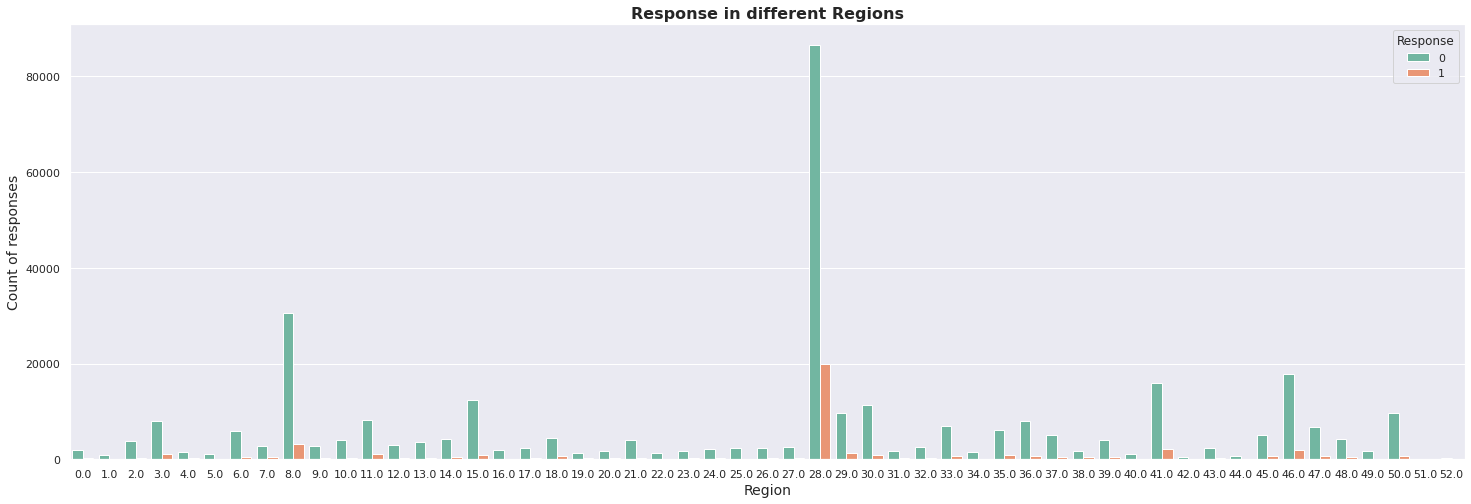

In [ ]:
# Chart - 4 visualization 
sns.set(rc={'figure.figsize':(25,8)})
sns.set_palette("Set2")
graph = sns.countplot(x=df['Region_Code'],hue=df['Response'])
graph.set_title('Response in different Regions',fontsize = 16, fontweight='bold')
graph.set_xlabel('Region',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

##### 1. Why did you pick the specific chart?

To study about response of customer in different region.

##### 2. What is/are the insight(s) found from the chart?

It shows that Region code-38 have the highest number of possibility for sales of Vehicle Insurance.

#### **Chart - 5 Previously Insured**

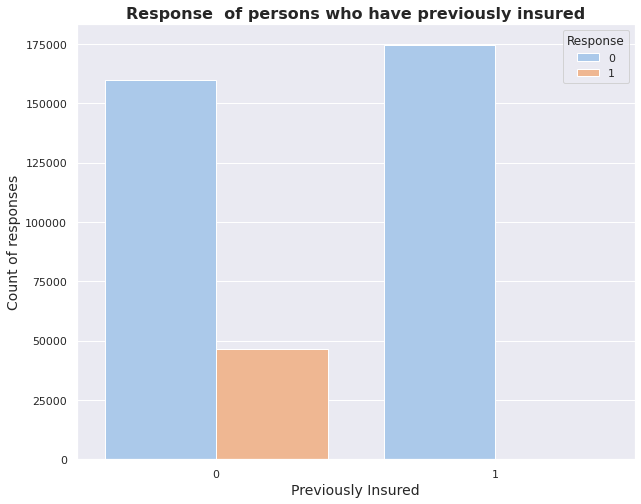

In [ ]:
# Chart - 5 visualization code
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("pastel")
graph = sns.countplot(x=df['Previously_Insured'],hue=df['Response'])
graph.set_title('Response  of persons who have previously insured',fontsize = 16, fontweight='bold')
graph.set_xlabel('Previously Insured',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

##### 1. What is/are the insight(s) found from the chart?



It clearly says that people who are not previously insured are more likely to take Vehicle Insurance.

####**Chart - 6 Vehicle Age Vs Response**

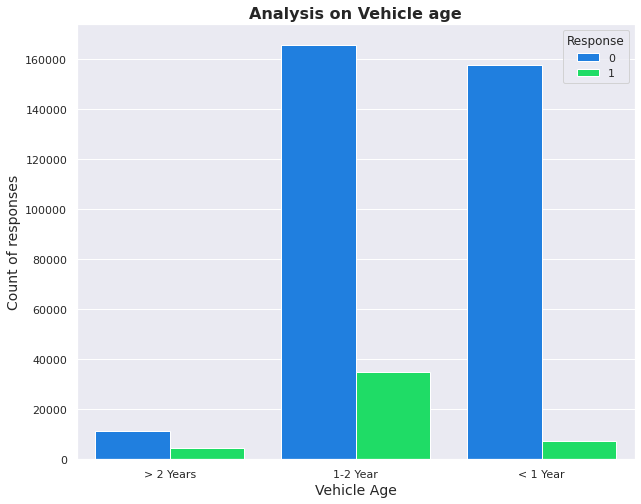

In [ ]:
# Chart - 6 visualization 
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("gist_ncar")
graph = sns.countplot(x=df['Vehicle_Age'],hue=df['Response'])
graph.set_title('Analysis on Vehicle age',fontsize = 16, fontweight='bold')
graph.set_xlabel('Vehicle Age',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

##### 1. Why did you pick the specific chart?

To draw analysis on vehical age.

##### 2. What is/are the insight(s) found from the chart?

This graph says that people having vehicle for 1-2 years are more interested in taking Vehicle insurance.

#### **Chart - 7 Vehicle Damage**

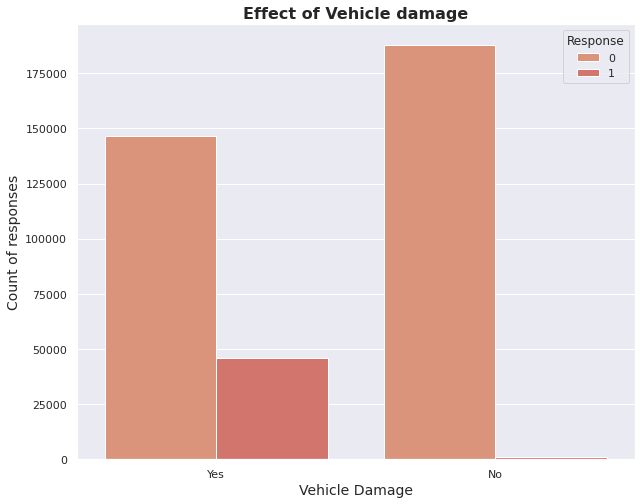

In [ ]:
# Chart - 7 visualization code

sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("flare")
graph = sns.countplot(x=df['Vehicle_Damage'],hue=df['Response'])
graph.set_title('Effect of Vehicle damage',fontsize = 16, fontweight='bold')
graph.set_xlabel('Vehicle Damage',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

##### 1. Why did you pick the specific chart?

To anlyse the effect of vehical damage.

##### 2. What is/are the insight(s) found from the chart?

Person facing Vehicle damage is more keened towards taking a vehicle insurance as depicted in the above graph

#### **Chart - 8. Annual_Premium**

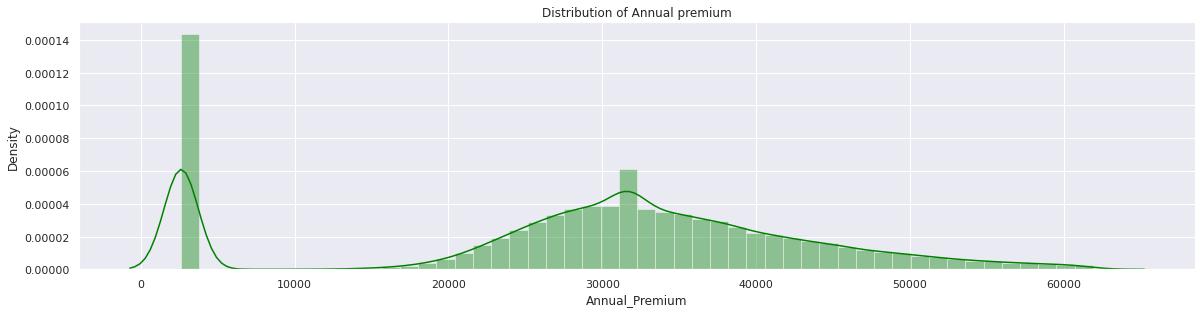

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.distplot(df['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()

In [ ]:
df['Annual_Premium_Group'] = df['Annual_Premium'].apply(lambda x:'Very Low Premium' if x <= 10000 else 'Low Premium' if x>10000 and x<=20000 else 'Medium Premium' if x>20000 and x<=30000 else 'High Premium' if x>30000 and x<=40000 else 'Very High Premium')


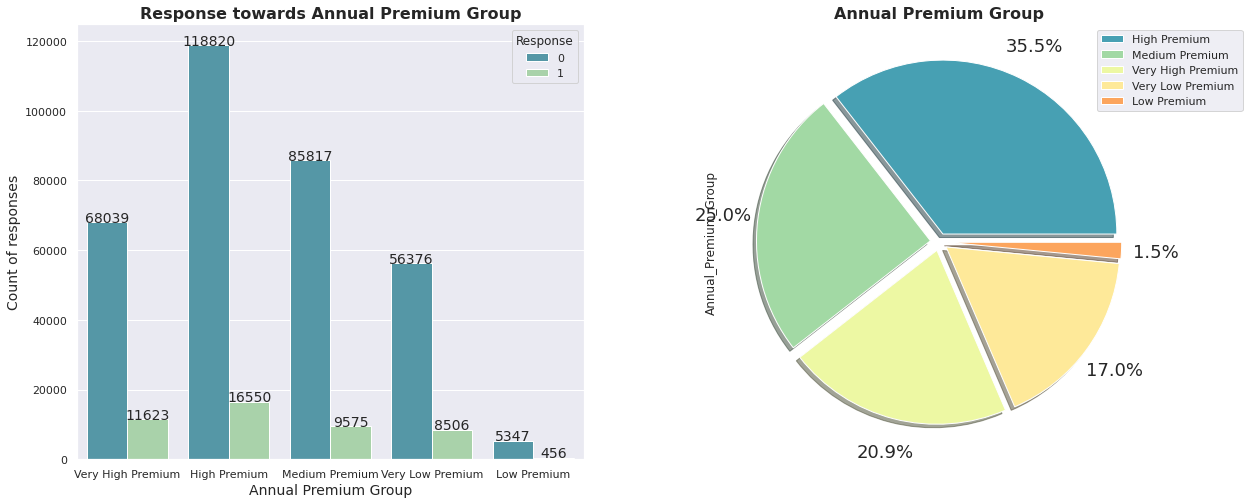

In [ ]:
# set lables
fig, axes = plt.subplots(1,2, figsize=(15, 8))

sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("Spectral_r")
ax = sns.countplot(ax=axes[0],x='Annual_Premium_Group', hue ='Response', data=df)
ax.set_title('Response towards Annual Premium Group',fontsize = 16, fontweight='bold')
ax.set_xlabel('Annual Premium Group',fontsize = 14)
ax.set_ylabel('Count of responses',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 14)

ax =axes[1],df['Annual_Premium_Group'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%', figsize=(20,8),fontsize=18,pctdistance=1.2,shadow=True,labeldistance=1.6,labels=None)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=df['Annual_Premium_Group'].value_counts().index.tolist())
plt.title('Annual Premium Group',fontsize = 16, fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?

To study response towards annual premium group.

##### 2. What is/are the insight(s) found from the chart?

We have grouped different annual premium into 5 groups namely- 'Very Low Premium', 'Low Premium', Medium Premium', 'High Premium', 'Very High Premium'.

We can see that most of the annual premium lies into High premium(between 30K and 40K).

Most of the people are interested in paying an annual premium in the range of 30K-40K.

#### **Chart - 9 Policy Sales Channel**

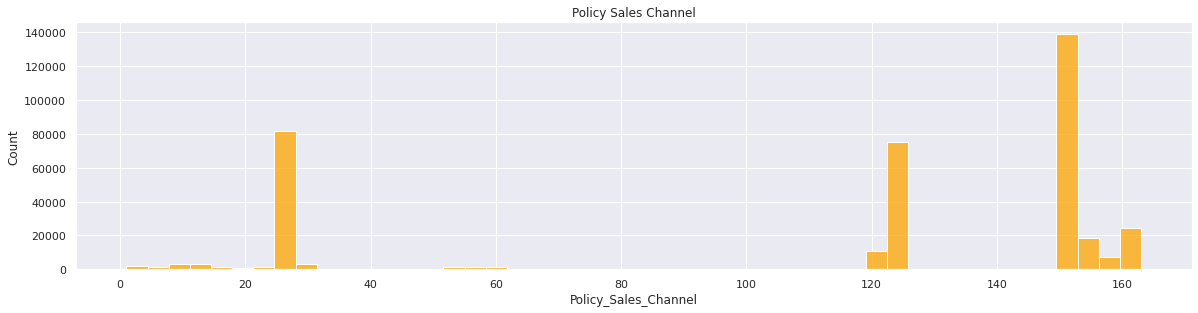

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.histplot(df['Policy_Sales_Channel'], color='orange')
plt.title("Policy Sales Channel")
plt.show()

In [ ]:
df['Policy_Sales_Channel_Group'] = df['Policy_Sales_Channel'].apply(lambda x:'Channel A' if x <=40 else 'Channel B' if x>40 and x<=80 else 'Channel C' if x>80 and x<=120 else 'Channel D')
     


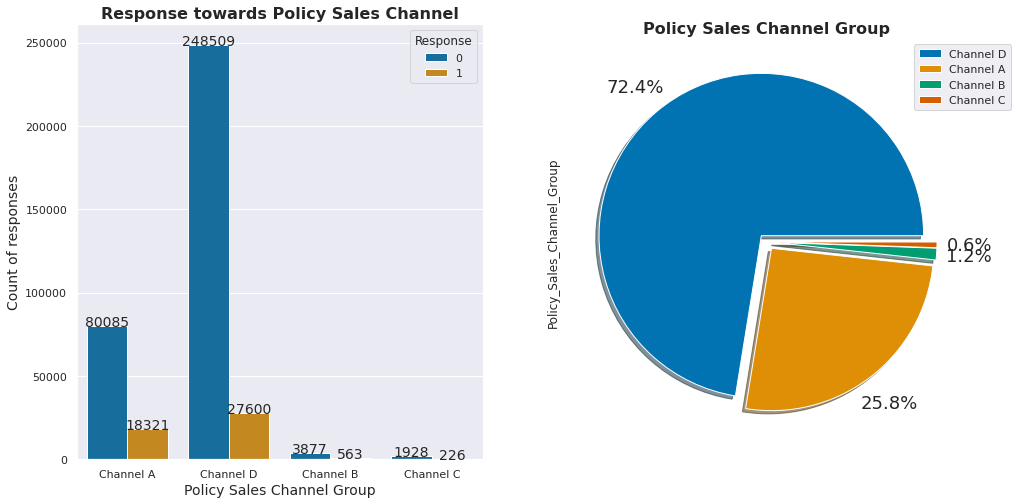

In [ ]:
#set lables
fig, axes = plt.subplots(1,2, figsize=(26, 8))

sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("colorblind")
ax = sns.countplot(ax=axes[0],x='Policy_Sales_Channel_Group', hue ='Response', data=df)
ax.set_title('Response towards Policy Sales Channel',fontsize = 16, fontweight='bold')
ax.set_xlabel('Policy Sales Channel Group',fontsize = 14)
ax.set_ylabel('Count of responses',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 14)

ax =axes[1],df['Policy_Sales_Channel_Group'].value_counts().plot.pie(explode=[0.05]*4, autopct='%1.1f%%', figsize=(16,8),fontsize=18,pctdistance=1.2,shadow=True,labeldistance=1.6,labels=None)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=df['Policy_Sales_Channel_Group'].value_counts().index.tolist())
plt.title('Policy Sales Channel Group',fontsize = 16, fontweight='bold')
plt.show()

##### 1. What is/are the insight(s) found from the chart?

It shows that Policy sales channel 150-160 has outreached the customer more as compared to others.

We have grouped Policy sales channel into 4 different groups i.e 'Channel A', 'Channel B', 'Channel C', 'Channel D'.

This states that maximum of Policy sales has been booked by Channel D.



#### **Chart 10. Vintage Vs Response**

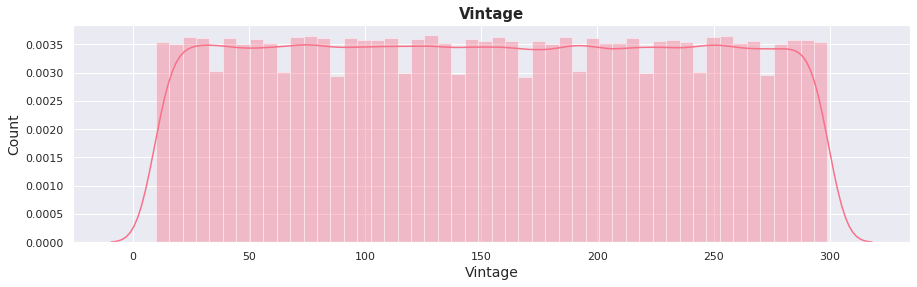

In [ ]:
sns.set(rc={'figure.figsize':(15,4)})
sns.set_palette("husl")
sns.distplot(x = df['Vintage'])
plt.xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
plt.ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
plt.title('Vintage',fontdict={'fontsize': 15,  'fontweight' :'bold'})
plt.show()

In [ ]:
df['Vintage_Group'] = df['Vintage'].apply(lambda x:'New Customer' if x <= 100 else 'Intermediate Customer' if x>100 and x<=200 else 'Old Customer')

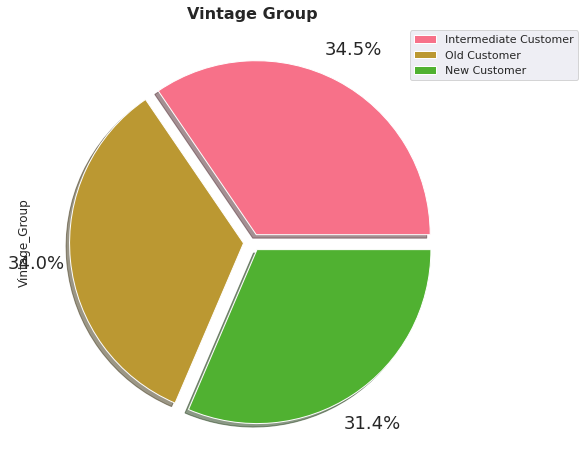

In [ ]:
df['Vintage_Group'].value_counts().plot.pie(explode=[0.05]*3, autopct='%1.1f%%', figsize=(15,8),fontsize=18,pctdistance=1.2,shadow=True,labeldistance=1.6,labels=None)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=df['Vintage_Group'].value_counts().index.tolist())
plt.title('Vintage Group',fontsize = 16, fontweight='bold')
plt.show()
     

##### 1. What is/are the insight(s) found from the chart?

Answer Here 
The distribution of Vintage Column is evenly spread which ranges from 10 days to 300 days.

We have grouped Vintage column into 3 types of customers- 'New Customer', 'Intermediate Customer', 'Old Customer').

This shows that all three types of customers are nearly equal in number.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Done Above

### 2. Handling Outliers

Done Above

### 3. Categorical Encoding

### **Label Encoding** 

In [ ]:
# Encode your categorical columns
# Label Encoding
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Age_Group'] = df['Age_Group'].apply(lambda x: 1 if x == 'Young Age' else 2 if x == 'Middle Age' else 3)
df['Vehicle_Age'] = df['Vehicle_Age'].apply(lambda x: 1 if x == '< 1 Year' else 2 if x == '1-2 Year' else 3)
df['Vehicle_Damage'] = df['Vehicle_Damage'].apply(lambda x: 0 if x == 'No' else 1)
df['Policy_Sales_Channel_Group'] = df['Policy_Sales_Channel_Group'].apply(lambda x:1 if x=='Channel A' else 2 if x=='Channel B' else 3 if x=='Channel C' else 4)
df['Vintage_Group'] = df['Vintage_Group'].apply(lambda x: 1 if x == 'New Customer' else 2 if x == 'Intermediate Customer' else 3)
df['Annual_Premium_Group'] = df['Annual_Premium_Group'].apply(lambda x: 1 if x == 'Very Low Premium' else 2 if x == 'Low Premium' else 3 if x== 'Medium Premium' else 4 if x== 'High Premium' else 5)
     

#### What all categorical encoding techniques have you used & why did you use those techniques?


We are removing 'Age', 'Annual Premium', 'Policy Sales Channel' and 'Vintage' as they have been grouped into separate columns.



# **One Hot Encoding**

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.



In [ ]:
cols_to_encode = ['Gender','Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
                  'Age_Group','Policy_Sales_Channel_Group','Annual_Premium_Group', 'Vintage_Group']

data_df = pd.get_dummies(data = df, columns=cols_to_encode)
data_df.head()


,Age,Driving_License,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_0,Gender_1,Region_Code_0.0,Region_Code_1.0,...,Policy_Sales_Channel_Group_3,Policy_Sales_Channel_Group_4,Annual_Premium_Group_1,Annual_Premium_Group_2,Annual_Premium_Group_3,Annual_Premium_Group_4,Annual_Premium_Group_5,Vintage_Group_1,Vintage_Group_2,Vintage_Group_3
0,44.0,1,40454.0,26.0,217,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,76.0,1,33536.0,26.0,183,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,47.0,1,38294.0,26.0,27,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,21.0,1,28619.0,152.0,203,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,29.0,1,27496.0,152.0,39,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0


### 4. Feature Manipulation & Selection

#### 4.1. Feature Manipulation

Separating Dependent and Independent Data

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
x=df.drop(['Response','Age','Vintage','Annual_Premium','Policy_Sales_Channel'],axis=1) #contain all  independent variable
y=df['Response'] #dependent variable

In [ ]:
x

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Age_Group,Annual_Premium_Group,Policy_Sales_Channel_Group,Vintage_Group
0,1,1,28.0,0,3,1,2,5,1,3
1,1,1,3.0,0,2,0,3,4,1,2
2,1,1,28.0,0,3,1,2,4,1,1
3,1,1,11.0,1,1,0,1,3,4,3
4,0,1,41.0,1,1,0,1,3,4,1
...,...,...,...,...,...,...,...,...,...,...
381104,1,1,26.0,1,2,0,3,4,1,1
381105,1,1,37.0,1,1,0,1,5,4,2
381106,1,1,30.0,1,1,0,1,4,4,2
381107,0,1,14.0,0,3,1,3,5,4,1


#### 4.2. Feature Selection

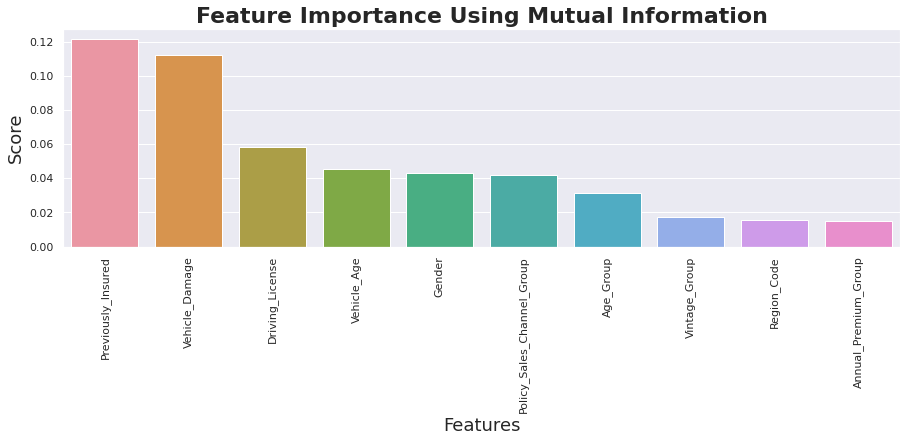

In [ ]:
# Select your features wisely to avoid overfitting
def mutual_info(df):
    X = x
    Y = y
    
    X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2)

    high_score_features = []
    feature_scores = mutual_info_classif( X_train, Y_train,  random_state=0)

    column_score = {}
    columns = []
    scores = []
    for score, f_name in sorted(zip(feature_scores, X_train.columns), reverse=True):
        columns.append(f_name)
        scores.append(score)
        high_score_features.append(f_name)

    column_score['Feature'] = columns
    column_score['Score'] = scores

    return pd.DataFrame(data = column_score)

def show_feature_importance_through_mi(df):
    sns.barplot(data = mutual_info(df), x = 'Feature', y='Score')
    plt.title('Feature Importance Using Mutual Information', fontdict={'fontsize':22,'fontweight':'bold'})
    plt.xlabel('Features', fontdict={'fontsize':18})
    plt.ylabel('Score', fontdict={'fontsize':18})
    plt.xticks(rotation=90)

show_feature_importance_through_mi(df)


##### Which all features you found important and why?


From the above bar plot, we can conclude Previously_Insured is the most important feature and has the highest impact on dependent feature and Region Code is the least dominant feature.



### 5. Handling Imbalanced Data`


<AxesSubplot:xlabel='Response', ylabel='count'>

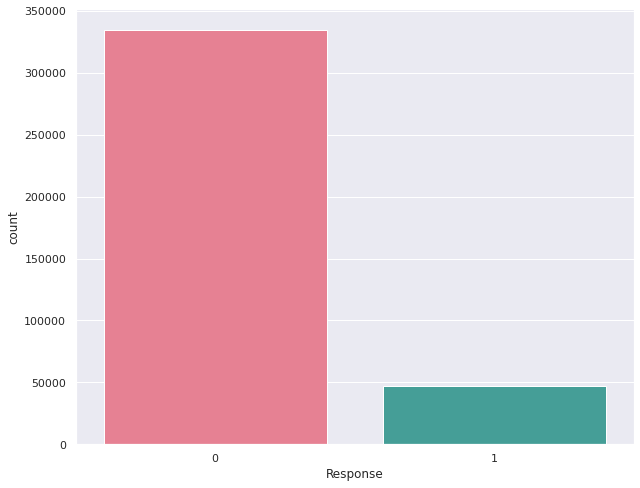

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(df['Response'],palette='husl')
     

##### Do you think the dataset is imbalanced? Explain Why.

Yes the dataset is highly imbalanced. There is large number of response'0' as compared to response '1' as shown above.

In [ ]:
# Transform Your data

smote = SMOTE()

# fit predictor and target variable
x_new, y_new = smote.fit_resample(x,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_new))


Original dataset shape 381109
Resampled dataset shape 668798


Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


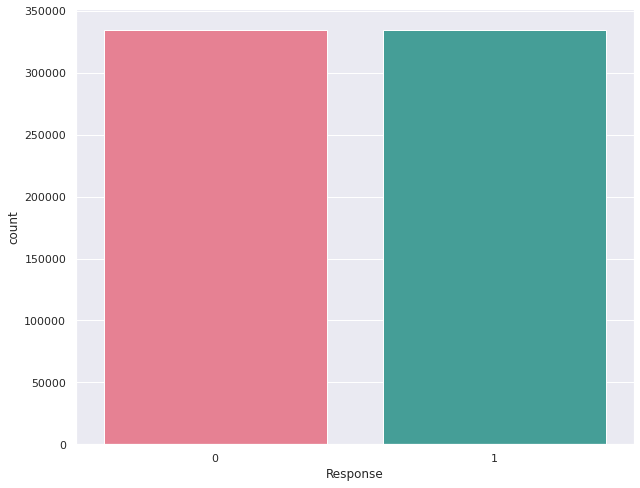

In [ ]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')
sns.set(rc={'figure.figsize':(4,4)})

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We have used SMOTE method to balance our dataset. SMOTE works by selecting pair of minority class observations and then creating a synthetic point that lies on the line connecting these two responses.

### 8. Data spliting  Train-Test Split

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# dividing the dataset into training and testing
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
     

(535038, 10) (133760, 10) (535038,) (133760,)


In [ ]:
x_train[0:10]

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Age_Group,Annual_Premium_Group,Policy_Sales_Channel_Group,Vintage_Group
309428,1,1,30.0,1,1,0,1,3,4,2
444462,0,1,23.0,0,2,1,1,3,4,3
162750,0,1,28.0,1,1,0,1,3,4,3
666951,1,1,28.0,0,2,1,3,5,1,1
264235,1,1,41.0,1,2,0,2,3,1,3
606902,1,1,28.0,0,1,1,2,3,4,1
437362,0,1,50.0,0,2,1,2,4,4,2
381172,1,1,8.0,0,2,1,1,4,1,1
461143,0,1,3.0,0,2,1,2,1,4,2
361038,1,1,46.0,1,1,0,1,3,4,1


##### What data splitting ratio have you used and why? 

We have splitted the dataset into training and testing data in the ratio of 80:20.

## ***7. ML Model Implementation***
We are applying different Machine Learning Models to our data set and see how each of them performs. Firstly, We will tune the hyper-parameters of those models and then we will compare and choose the best model among them.






1. Decision Tree
2. Random Forest

1.   KNN
2.   Light GBM













### ML Model - 1 
## **Decision Tree**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
A decision tree is a type of machine learning algorithm used for classification and regression analysis. It is a tree-like model where each node represents a feature or attribute, each branch represents a decision or rule, and each leaf node represents a classification or regression output.

In [ ]:
# ML Model - 1 Implementation
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, max_leaf_nodes=2,
                       min_samples_leaf=5)
dt.fit(x_train, y_train)

# Fit the Algorithm

# Predict on the model

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=2, min_samples_leaf=5)

In [ ]:
y_pred = dt.predict(x_test)

In [ ]:
acc_DT = accuracy_score(y_test,y_pred)
prec_DT = precision_score(y_test, y_pred)
rec_DT = recall_score(y_test, y_pred)
f1_DT = f1_score(y_test, y_pred)
AUC_DT=roc_auc_score(y_pred,y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.56      0.71     66950
           1       0.69      0.98      0.81     66810

    accuracy                           0.77    133760
   macro avg       0.83      0.77      0.76    133760
weighted avg       0.83      0.77      0.76    133760



In [ ]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_DT)

Accuracy :  0.7689518540669856
ROC_AUC Score: 0.8264119346965307


#### 2. Cross- Validation & Hyperparameter Tuning
The performance of the model is then evaluated using a validation set, and the best performing hyperparameters are selected for the next iteration.We have used Halving Random Search CV method for Hyperparameter Tuning.

Because it reduces the number of trials required to find the optimal hyperparameters. It is particularly useful for models with a large number of hyperparameters or when training on large datasets.



In [ ]:
# Create the parameter grid based on the results of random search 
params = {"splitter":["best","random"],
            "max_depth" : [1,3,4,5,7,9,10,12,15],
           "min_samples_leaf":[1,2,3,4,5,6,8,10],
           "max_leaf_nodes":[10,20,30,40,50,60,70,80,100],
           'criterion': ["gini", "entropy"]}

In [ ]:
# Instantiate the grid search cv model
halving_search_cv = HalvingRandomSearchCV(dt, param_distributions = params, scoring = "accuracy", n_jobs=-1, factor=3, cv = 5 )

In [ ]:
%%time
halving_search_cv.fit(x_train, y_train)

CPU times: user 20.1 s, sys: 7.23 s, total: 27.3 s
Wall time: 2min 16s


HalvingRandomSearchCV(estimator=DecisionTreeClassifier(max_depth=5,
                                                       max_leaf_nodes=2,
                                                       min_samples_leaf=5),
                      n_jobs=-1,
                      param_distributions={'criterion': ['gini', 'entropy'],
                                           'max_depth': [1, 3, 4, 5, 7, 9, 10,
                                                         12, 15],
                                           'max_leaf_nodes': [10, 20, 30, 40,
                                                              50, 60, 70, 80,
                                                              100],
                                           'min_samples_leaf': [1, 2, 3, 4, 5,
                                                                6, 8, 10],
                                           'splitter': ['best', 'random']},
                      scoring='accuracy')

In [ ]:
halving_search_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=50,
                       min_samples_leaf=5, splitter='random')

In [ ]:
dt_best = halving_search_cv.best_estimator_

In [ ]:
dt_best.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=50,
                       min_samples_leaf=5, splitter='random')

In [ ]:
y_pred_dt = dt_best.predict(x_test)

In [ ]:
acc_DT = accuracy_score(y_test,y_pred_dt)
prec_DT = precision_score(y_test, y_pred_dt)
rec_DT = recall_score(y_test, y_pred_dt)
f1_DT = f1_score(y_test, y_pred_dt)
AUC_DT=roc_auc_score(y_pred_dt,y_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73     66950
           1       0.70      0.98      0.82     66810

    accuracy                           0.78    133760
   macro avg       0.83      0.78      0.78    133760
weighted avg       0.83      0.78      0.78    133760



In [ ]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred_dt))
print("ROC_AUC Score:",AUC_DT)
     

Accuracy :  0.7835376794258373
ROC_AUC Score: 0.8343221789856177


##### Which hyperparameter optimization technique have you used and why?

We have used Halving Random Search CV method for Hyperparameter Tuning as it is fast and gives a cross validation over a large range of values.

::##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes we have seen some improvement in accurace score that has been mentioned above.

**Confusion Matrix**

The confusion matrix helps to evaluate the accuracy of a classification model by providing information on the number of correct and incorrect predictions made by the model.

The true positive and true negative values represent the correct predictions, while false positives and false negatives represent incorrect predictions.

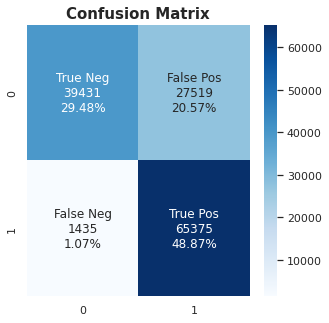

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
plt.title('Confusion Matrix',fontdict={'fontsize': 15,  'fontweight' :'bold'})
plt.show()
     

**ROC-AUC Curve**

The area under the ROC curve (ROC AUC) is a commonly used metric for evaluating the performance of binary classification models. It measures the degree of separability between the two classes.

Graphical representation of the performance of a binary classification model. It is a plot of the True Positive Rate (TPR) against the False Positive Rate (FPR) for different classification thresholds.

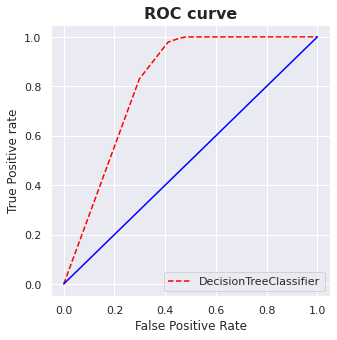

In [ ]:
# predict probabilities
pred_proba = dt_best.predict_proba(x_test)

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
       
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr, tpr,linestyle='--',color='red', label = type(dt_best).__name__)
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')

# title
plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
plt.ylabel('True Positive rate', fontdict={'fontsize': 12})
plt.legend(loc='best')
plt.show()

#### 3. Visualization

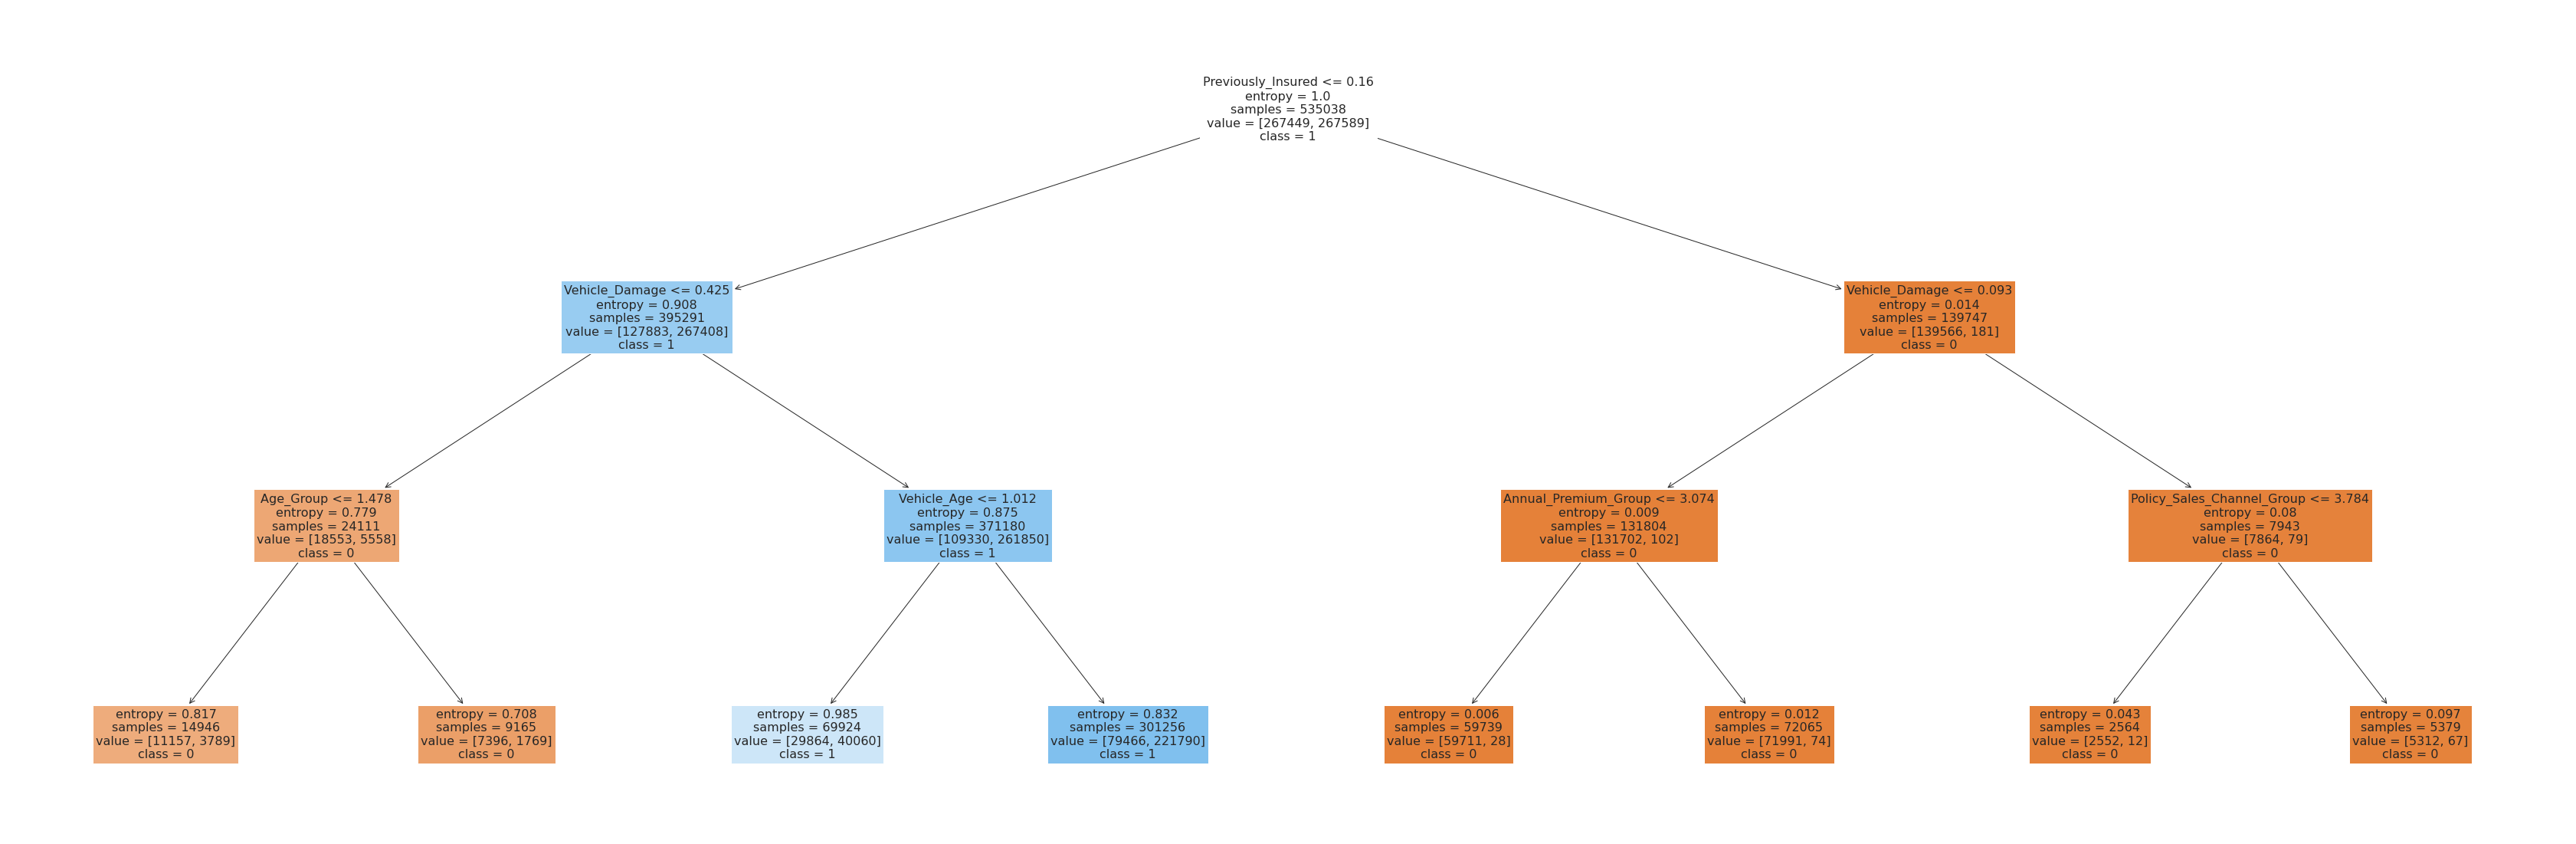

In [ ]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(60,20))
a = plot_tree(dt_best, feature_names=x_train.columns, fontsize=16, filled=True, 
              class_names=['0','1'])

### ML Model - 2 
### **Random Forest**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
A random forest is a supervised learning algorithm that is used for classification, regression, and other tasks in machine learning. It is an ensemble method that consists of multiple decision trees, where each tree is trained on a randomly sampled subset of the training data and features.

When making a prediction, the random forest combines the predictions of all the trees in the forest to produce a final prediction. The final prediction is typically based on a majority vote for classification problems or an average for regression problems.



In [ ]:
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=5,
                       random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=5,
                       random_state=0)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
AUC_RF=roc_auc_score(y_pred,y_test)
acc_RF=accuracy_score(y_test,y_pred)
recall_RF=recall_score(y_test,y_pred)
precision_RF=precision_score(y_test,y_pred)
f1score_RF=f1_score(y_test,y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.64      0.75     66950
           1       0.72      0.95      0.82     66810

    accuracy                           0.79    133760
   macro avg       0.83      0.79      0.79    133760
weighted avg       0.83      0.79      0.79    133760



In [ ]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_RF)

Accuracy :  0.7928827751196172
ROC_AUC Score: 0.8252969561419755


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
params = {'n_estimators' : [20,50,100], 
          'max_depth' : [10,20,50], 
          'min_samples_split' : [2,10,15,20], 
          'min_samples_leaf' : [1,3,5,7,10],
          'criterion': ["gini", "entropy"]
          }

In [ ]:
rf_random = HalvingRandomSearchCV(rf, param_distributions = params, scoring = "accuracy", n_jobs=-1, factor=3, cv = 5 )

In [ ]:
%%time
rf_random.fit(x_train, y_train)

CPU times: user 1min 1s, sys: 5.4 s, total: 1min 6s
Wall time: 5min 41s


HalvingRandomSearchCV(estimator=RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=10,
                                                       min_samples_split=5,
                                                       random_state=0),
                      n_jobs=-1,
                      param_distributions={'criterion': ['gini', 'entropy'],
                                           'max_depth': [10, 20, 50],
                                           'min_samples_leaf': [1, 3, 5, 7, 10],
                                           'min_samples_split': [2, 10, 15, 20],
                                           'n_estimators': [20, 50, 100]},
                      scoring='accuracy')

In [ ]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=50, min_samples_leaf=5, min_samples_split=10,
                       random_state=0)

In [ ]:
rf_best = rf_random.best_estimator_

In [ ]:
rf_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=5, min_samples_split=10,
                       random_state=0)

In [ ]:
y_pred_rf = rf_best.predict(x_test)

In [ ]:
acc_RF = accuracy_score(y_test,y_pred_rf)
prec_RF = precision_score(y_test, y_pred_rf)
rec_RF = recall_score(y_test, y_pred_rf)
f1_RF = f1_score(y_test, y_pred_rf)
AUC_RF=roc_auc_score(y_pred_rf,y_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78     66950
           1       0.75      0.94      0.83     66810

    accuracy                           0.81    133760
   macro avg       0.83      0.81      0.81    133760
weighted avg       0.83      0.81      0.81    133760



In [ ]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred_rf))
print("ROC_AUC Score:",AUC_RF)

Accuracy :  0.808440490430622
ROC_AUC Score: 0.8298528977328951


##### Which hyperparameter optimization technique have you used and why?

We have used Halving Random Search CV method for Hyperparameter Tuning.

Because it reduces the number of trials required to find the optimal hyperparameters. It is particularly useful for models with a large number of hyperparameters or when training on large datasets.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes we have seen some improvement that has been mentioned above

**Confusion Matrix**

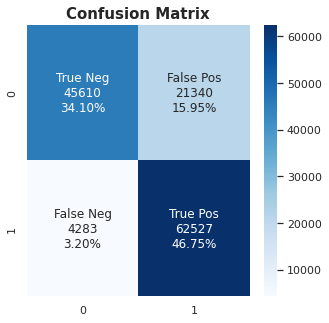

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
plt.title('Confusion Matrix',fontdict={'fontsize': 15,  'fontweight' :'bold'})
plt.show()

**ROC-AUC Curve**

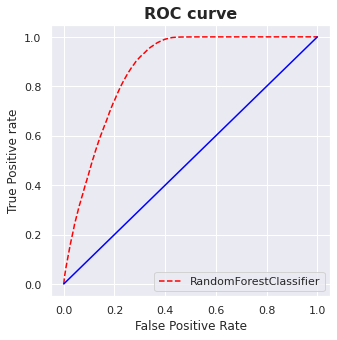

In [ ]:
# predict probabilities
pred_proba = rf_best.predict_proba(x_test)

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
       
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr, tpr,linestyle='--',color='red', label = type(rf_best).__name__)
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')

# title
plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
plt.ylabel('True Positive rate', fontdict={'fontsize': 12})
plt.legend(loc='best')
plt.show()

### 3. Visualization

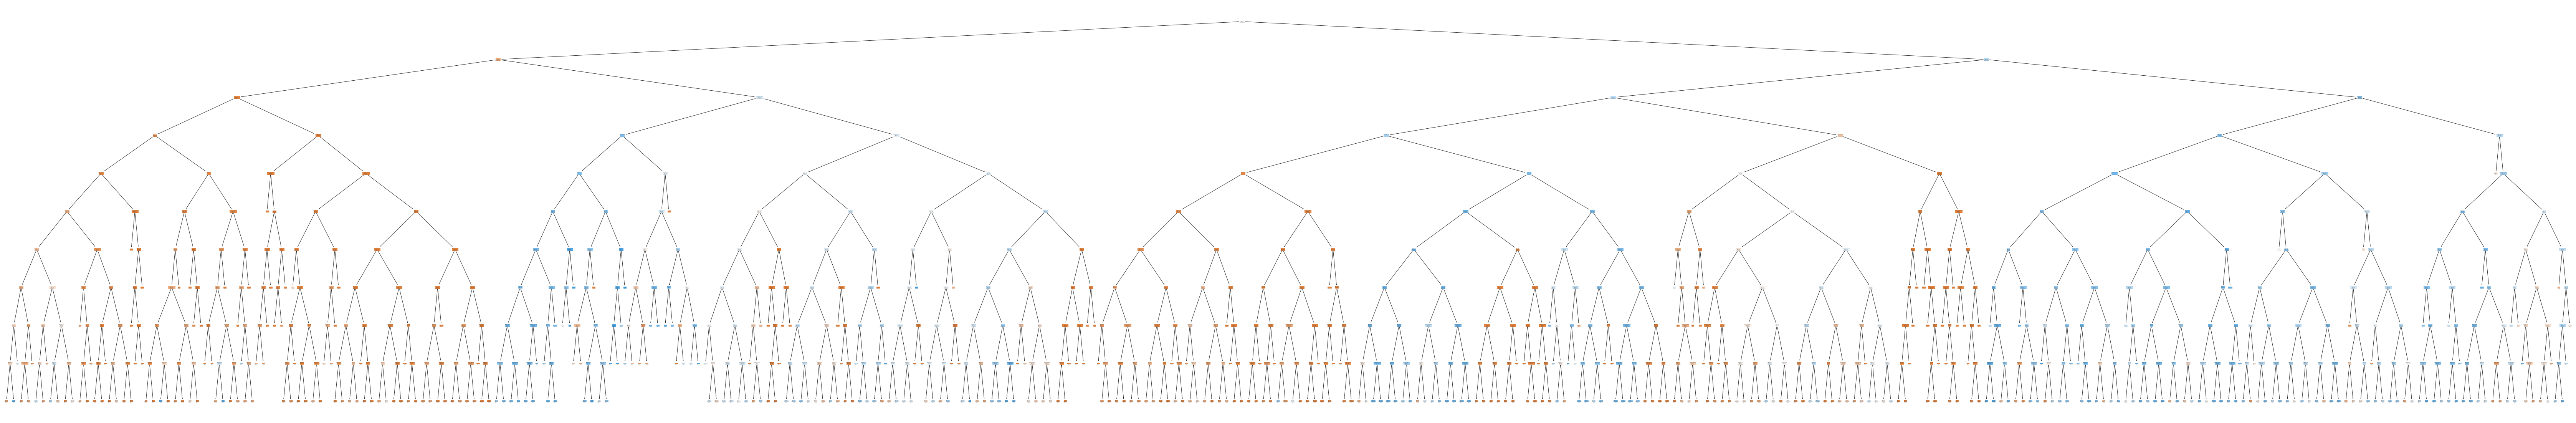

In [ ]:
fig = plt.figure(figsize=(120,20))
a = plot_tree(rf.estimators_[0],
               feature_names = x_train.columns,
               filled = True,
              class_names=['0','1'])

### **ML Model - 3. KNN Classifier**



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The KNN classifier works by calculating the distance between the input data point and all the data points in the training set. The k-nearest neighbors are the data points with the smallest distance to the input data point. The class of the input data point is then assigned as the majority class of its k-nearest neighbors.

In [ ]:
# ML Model - 3 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)



KNeighborsClassifier()

In [ ]:
# Predicting the Test set results  
y_pred = knn.predict(x_test) 

In [ ]:
acc_KNN = accuracy_score(y_test,y_pred)
prec_KNN = precision_score(y_test, y_pred)
rec_KNN = recall_score(y_test, y_pred)
f1_KNN = f1_score(y_test, y_pred)
AUC_KNN=roc_auc_score(y_pred,y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.69      0.76     66950
           1       0.74      0.88      0.81     66810

    accuracy                           0.79    133760
   macro avg       0.80      0.79      0.79    133760
weighted avg       0.80      0.79      0.78    133760



In [ ]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_KNN)

Accuracy :  0.7869766746411483
ROC_AUC Score: 0.7981276667259332


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

grid_params = { 'n_neighbors' : range(1, 51),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']
               }

In [ ]:
gs = HalvingRandomSearchCV(knn, param_distributions=grid_params, scoring='accuracy', return_train_score=True, verbose=1, cv=5)
     

In [ ]:
# fit the model on our train set
%%time
gs.fit(x_train, y_train)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 10
min_resources_: 20
max_resources_: 535038
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 300
n_resources: 20
Fitting 5 folds for each of 300 candidates, totalling 1500 fits
----------
iter: 1
n_candidates: 100
n_resources: 60
Fitting 5 folds for each of 100 candidates, totalling 500 fits
----------
iter: 2
n_candidates: 34
n_resources: 180
Fitting 5 folds for each of 34 candidates, totalling 170 fits
----------
iter: 3
n_candidates: 12
n_resources: 540
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 4
n_candidates: 4
n_resources: 1620
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 5
n_candidates: 2
n_resources: 4860
Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 39.7 s, sys: 561 ms, total: 40.3 s
Wall time: 37.7 s


HalvingRandomSearchCV(estimator=KNeighborsClassifier(),
                      param_distributions={'metric': ['minkowski', 'euclidean',
                                                      'manhattan'],
                                           'n_neighbors': range(1, 51),
                                           'weights': ['uniform', 'distance']},
                      scoring='accuracy', verbose=1)

In [ ]:
# find the best score
gs.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [ ]:
knn_best=gs.best_estimator_

In [ ]:

knn_best.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [ ]:
y_pred_knn = knn_best.predict(x_test)

In [ ]:
acc_KNN = accuracy_score(y_test,y_pred_knn)
prec_KNN = precision_score(y_test, y_pred_knn)
rec_KNN = recall_score(y_test, y_pred_knn)
f1_KNN = f1_score(y_test, y_pred_knn)
AUC_KNN=roc_auc_score(y_pred_knn,y_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77     66950
           1       0.74      0.90      0.81     66810

    accuracy                           0.79    133760
   macro avg       0.81      0.79      0.79    133760
weighted avg       0.81      0.79      0.79    133760



In [ ]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred_knn))
print("ROC_AUC Score:",AUC_KNN)

Accuracy :  0.7927855861244019
ROC_AUC Score: 0.8079769139125403


##### Which hyperparameter optimization technique have you used and why?

We have used Halving Random Search CV method for Hyperparameter Tuning.

Because it reduces the number of trials required to find the optimal hyperparameters. It is particularly useful for models with a large number of hyperparameters or when training on large datasets.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Accuracy improvement is seen.

**Before**

Accuracy :  0.7810182416267942

ROC_AUC Score: 0.7898357419756032

After hyperparameter tuning

Accuracy :  0.7918286483253588

ROC_AUC Score: 0.8095670281290739

### Confusion Matrix

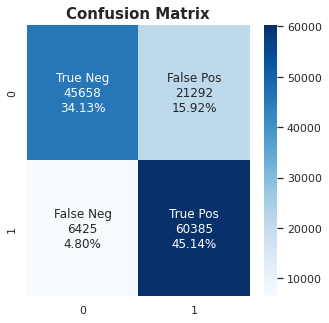

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
plt.title('Confusion Matrix',fontdict={'fontsize': 15,  'fontweight' :'bold'})
plt.show()


### ROC-AUC Curve

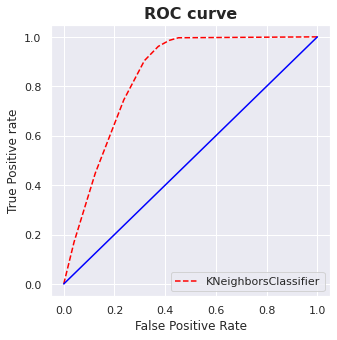

In [ ]:
# predict probabilities
pred_proba = knn_best.predict_proba(x_test)

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
       
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr, tpr,linestyle='--',color='red', label = type(knn_best).__name__)
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')

# title
plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
plt.ylabel('True Positive rate', fontdict={'fontsize': 12})
plt.legend(loc='best')
plt.show()

### **ML Model - 4  Light GBM Classifier** 

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

LightGBM (Light Gradient Boosting Machine) is a gradient boosting framework that uses tree-based learning algorithms.

The main advantage of LightGBM is its speed, as it uses techniques such as histogram-based gradient boosting and leaf-wise tree growth to improve training speed and reduce memory usage. It also supports parallel and distributed training, making it suitable for large datasets

In [ ]:
# ML Model - 4
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)


LGBMClassifier()

In [ ]:
# Predicting the Test set results  
y_pred = lgbm.predict(x_test)

In [ ]:
acc_LGBM = accuracy_score(y_test,y_pred)
prec_LGBM = precision_score(y_test, y_pred)
rec_LGBM = recall_score(y_test, y_pred)
f1_LGBM = f1_score(y_test, y_pred)
AUC_LGBM=roc_auc_score(y_pred,y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77     66950
           1       0.74      0.93      0.82     66810

    accuracy                           0.80    133760
   macro avg       0.82      0.80      0.80    133760
weighted avg       0.82      0.80      0.80    133760



In [ ]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_LGBM)


Accuracy :  0.7988636363636363
ROC_AUC Score: 0.8207989503176658


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}


In [ ]:
gs = RandomizedSearchCV(lgbm, param_distributions=param_test, scoring='roc_auc', cv=3, refit=True, verbose=True)

In [ ]:
gs.fit(x_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(),
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ff24e9e88b0>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ff208289be0>,
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ff24e9ca640>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10,
                                                      50, 100],
                                        'reg_lambda': [0, 0.1, 1, 5, 10, 20, 50,
                                                       100],
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ff24e9b78b0>},
                   scoring='roc_auc', verbose=True)

In [ ]:
lgbm_best=gs.best_estimator_

In [ ]:
lgbm_best.fit(x_train,y_train)

LGBMClassifier(colsample_bytree=0.5578017272567861, min_child_samples=118,
               num_leaves=37, reg_alpha=1, reg_lambda=0,
               subsample=0.3353926575820978)

In [ ]:
y_pred_lgbm = lgbm_best.predict(x_test)

In [ ]:
acc_LGBM = accuracy_score(y_test,y_pred_lgbm)
prec_LGBM = precision_score(y_test, y_pred_lgbm)
rec_LGBM = recall_score(y_test, y_pred_lgbm)
f1_LGBM = f1_score(y_test, y_pred_lgbm)
AUC_LGBM=roc_auc_score(y_pred_lgbm,y_test)
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.91      0.66      0.77     66950
           1       0.73      0.93      0.82     66810

    accuracy                           0.80    133760
   macro avg       0.82      0.80      0.79    133760
weighted avg       0.82      0.80      0.79    133760



In [ ]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred_lgbm))
print("ROC_AUC Score:",AUC_LGBM)

Accuracy :  0.7976450358851674
ROC_AUC Score: 0.8202963950641499


##### Which hyperparameter optimization technique have you used and why?

RandomizedSearchCV is a popular technique in machine learning because it is more efficient 
which performs an exhaustive search over all possible hyperparameter combinations. RandomizedSearchCV is also less prone to overfitting compared to GridSearchCV, especially when the search space is large.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Accuracy improvement seen.


#### Confusion Matrix


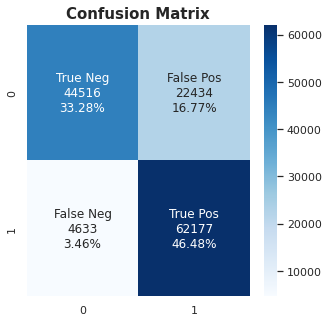

In [ ]:
cm = confusion_matrix(y_test, y_pred_lgbm)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
plt.title('Confusion Matrix',fontdict={'fontsize': 15,  'fontweight' :'bold'})
plt.show()


#### ROC-AUC Curve

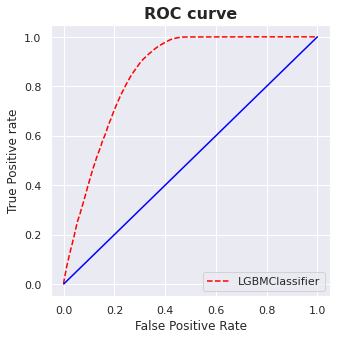

In [ ]:
# predict probabilities
pred_proba = lgbm_best.predict_proba(x_test)

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
       
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr, tpr,linestyle='--',color='red', label = type(lgbm_best).__name__)
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')

# title
plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
plt.ylabel('True Positive rate', fontdict={'fontsize': 12})
plt.legend(loc='best')
plt.show()

## Comparision Metrices

In [ ]:
ind=['Decision Tree','Random Forest','KNN','LightGBM']
data={"Accuracy":[acc_DT,acc_RF,acc_KNN, acc_LGBM],"Recall":[rec_DT,rec_RF,rec_KNN,rec_LGBM],"Precision":[prec_DT,prec_RF,prec_KNN,prec_LGBM],
    'f1_score':[f1_DT,f1_RF,f1_KNN,f1_LGBM],"ROC_AUC":[AUC_DT,AUC_RF,AUC_KNN,AUC_LGBM]}
result=pd.DataFrame(data=data,index=ind).sort_values(by='Accuracy',ascending=False)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Random Forest,0.808440,0.935893,0.745550,0.829948,0.829853
LightGBM,0.797645,0.930654,0.734857,0.821247,0.820296
KNN,0.792786,0.903832,0.739315,0.813337,0.807977
Decision Tree,0.783538,0.978521,0.703759,0.818702,0.834322


# **Conclusion**

### 1. Which ML model did you choose from the above created models as your final prediction model and why?

### We can see that Random Forest is having the maximum Accuracy among all models, hence it is the best model to train.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***